![ieseg logo](./img/ieseg.png)

#### MBD 2020-2021
# Statistical & Machine Learning Approaches for Marketing

## Section 1: Introduction & Linear Regression

### 1. Import all required libraries and datasets

In [15]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr3)        # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots

# Dataset
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
# library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Warning message:
"package 'mlr3' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'plotrix' was built under R version 3.6.3"Warning message:
"package 'rgl' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'rgl' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'htmltools' 0.3.6 is already loaded, but >= 0.4.0.9003 is required


In [2]:
# Install missing packages
# install.packages(c("data.table", "mlr3", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))

In [14]:
install.packages(c("data.table", "mlr3", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))

Warning message:
"package 'datasets' is not available (for R version 3.6.1)"Warning message:
"package 'datasets' is a base package, and should not be updated"also installing the dependencies 'numDeriv', 'SQUAREM', 'lava', 'listenv', 'parallelly', 'rpart', 'prodlim', 'future', 'globals', 'PRROC', 'codetools', 'iterators', 'gower', 'ipred', 'timeDate', 'lazyeval', 'miniUI', 'webshot', 'future.apply', 'lgr', 'mlbench', 'mlr3measures', 'mlr3misc', 'paradox', 'foreach', 'ModelMetrics', 'recipes', 'pROC', 'crosstalk', 'manipulateWidget'

Warning message:
"package 'data.table' is in use and will not be installed"

package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'rpart' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'PRROC' successfully unpacked and MD5 sums checked
package 'codetools' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'miniUI' successfu

Warning message:
"cannot remove prior installation of package 'MASS'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Anaconda3\Lib\R\library\00LOCK\MASS\libs\x64\MASS.dll to C:\Anaconda3\Lib\R\library\MASS\libs\x64\MASS.dll: Permission denied"Warning message:
"restored 'MASS'"


The downloaded binary packages are in
	C:\Users\feledu1\AppData\Local\Temp\Rtmp8qpisF\downloaded_packages


### 2. Simulate the curese of dimensionality

#### Generating sample data

In [6]:
# Generate the n x p matrix, uniform distribution [-1, 1]
set.seed(1)
n = 1000  # Number of data points (row)
p = 10    # Number of dimensions (column)
mat = matrix(runif(n * p, min=-1, max=1), ncol=p)  # Matrix
dim(mat)

# Create a random data point
set.seed(1)
p_point = runif(p, min=-1, max=1)  # A random point

# Set the number of nearest neighbors to estimate a data point = 10% of all data
k = round(n * 0.1, 0)

[1] 1000   10

#### Some useful functions

In [7]:
# Function to calculate the euclidean distance
euclidean_distance <- function(point, data) {
    # If the data in a vector (matrix with 1 column) convert data to matrix
    if (!is.matrix(data)) data <- matrix(data)
    
    # Return euclidean distance from a point to all points in the data
    return(sqrt(rowSums((t(point - t(data))) ^ 2)))
}

# Function to find nearest points from a point
nearest_points <- function(point, data, k) {   
    # Calculate euclidean distance from a point to all points in the data
    euclidean_dist <- euclidean_distance(point, data)
    
    # Sort the data by increasing and return the index
    lst <- sort(euclidean_dist, index.return=TRUE, decreasing=FALSE)
    
    # Return top k-nearest points
    return(lst$ix[1:k])
}

# Function to find the radius (max distance) from a point to a group of points
radius <- function(point, data) {    
    # Calculate euclidean distance from a point to all points in the data
    euclidean_dist <- euclidean_distance(point, data)
    
    # Return the max distance
    return(max(euclidean_dist))
}

#### The radius to cover 10% of nearest data point in 1D

[1] "Radius = 0.11374937556684"


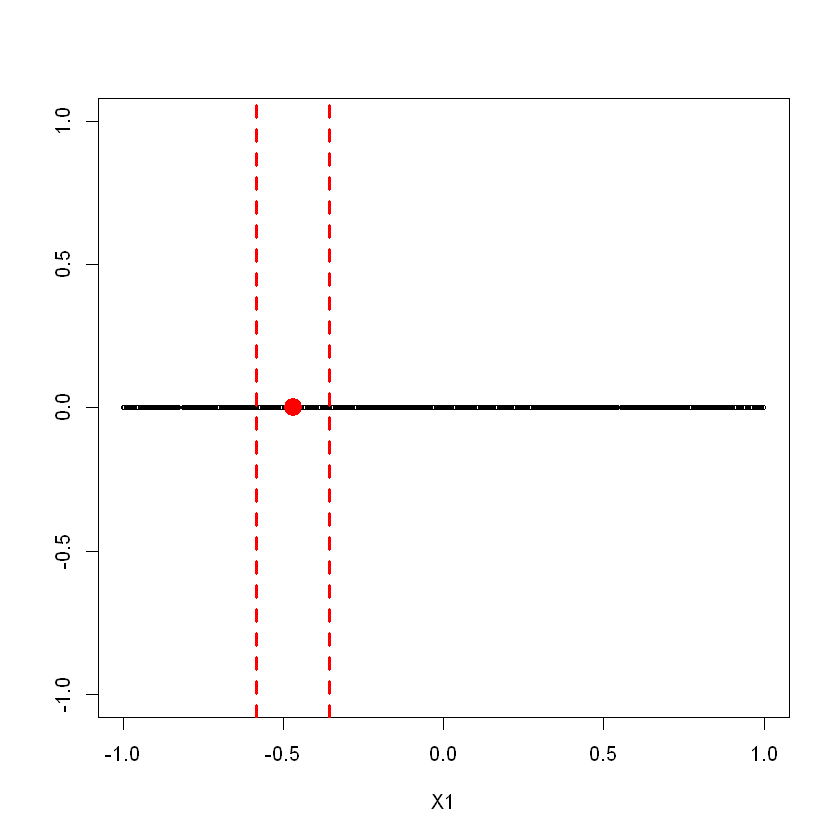

In [10]:
# Extract the data for 1D
point_1d <- p_point[1]
data_1d <- matrix(mat[, c(1)], ncol=1)

# Find the radius to get 10% of nearest data points
nearest_1d <- nearest_points(point_1d, data_1d, k)
radius_1d <- radius(point_1d, data_1d[nearest_1d, ])
print(paste0('Radius = ', radius_1d))

# Visualize
plot(data.frame(data_1d, 0), cex=0.5, xlab="X1", ylab="")
points(x=point_1d, y=0, type="p", col="red", pch=19, cex=2)
abline(v=point_1d-radius_1d, col='red', lwd=3, lty=2)
abline(v=point_1d+radius_1d, col='red', lwd=3, lty=2)

#### The radius to cover 10% of nearest data point in 2D

[1] "Radius = 0.324015602966024"


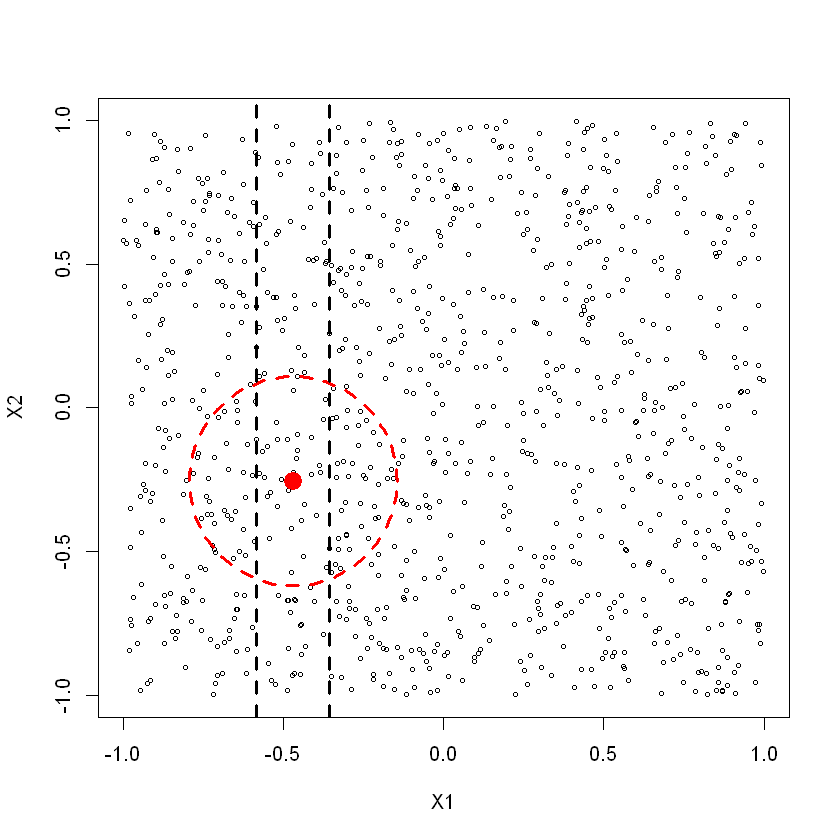

In [11]:
# Extract the data for 2D
point_2d <- p_point[1:2]
data_2d <- mat[, 1:2]

# Find the radius to get 10% of nearest data points
nearest_2d <- nearest_points(point_2d, data_2d, k)
radius_2d <- radius(point_2d, data_2d[nearest_2d, ])
print(paste0('Radius = ', radius_2d))

# Visualize
plot(data_2d, cex=0.5, xlab="X1", ylab="X2")
points(x=point_2d[1], y=point_2d[2], type="p", col="red", pch=19, cex=2)
draw.circle(x=point_2d[1], y=point_2d[2], radius=radius_2d,
            nv=100, border='red', col=NA, lwd=3, lty=2)
abline(v=point_2d[1]-radius_1d, col='black', lwd=3, lty=2)
abline(v=point_2d[1]+radius_1d, col='black', lwd=3, lty=2)

#### The radius to cover 10% of nearest data point in 3D

[1] "Radius = 0.565858920766801"


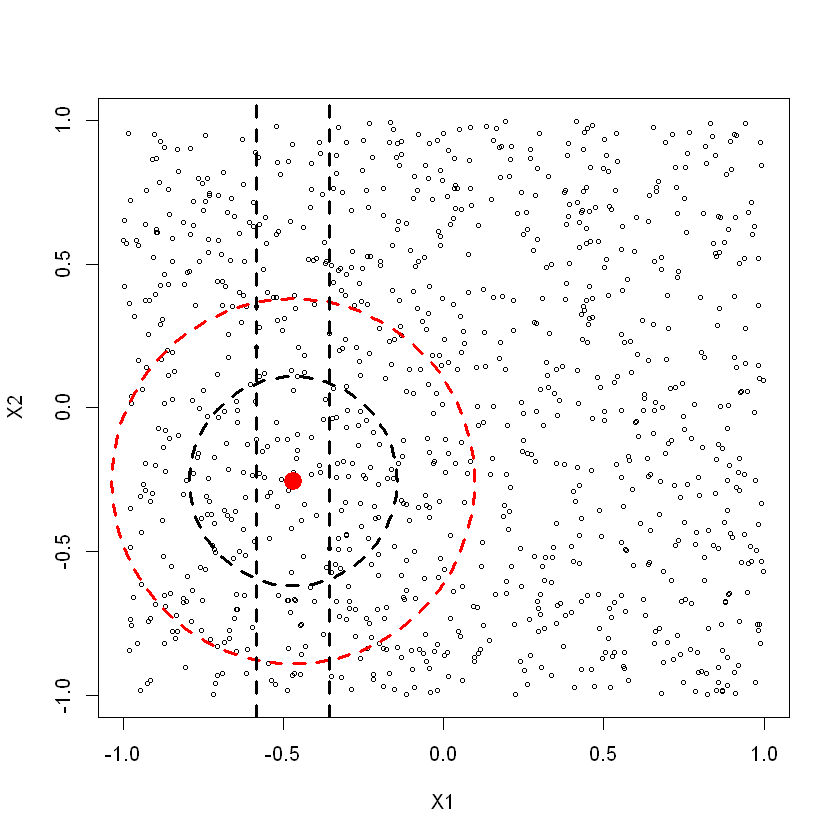

In [12]:
# Extract the data for 3D
point_3d <- p_point[1:3]
data_3d <- mat[, 1:3]

# Find the radius to get 10% of nearest data points
nearest_3d <- nearest_points(point_3d, data_3d, k)
radius_3d <- radius(point_3d, data_3d[nearest_3d, ])
print(paste0('Radius = ', radius_3d))

# Visualize in 2D
plot(data_3d, cex=0.5, xlab="X1", ylab="X2")
points(x=point_3d[1], y=point_3d[2], type="p", col="red", pch=19, cex=2)
draw.circle(x=point_3d[1], y=point_3d[2], radius=radius_3d,
            nv=100, border='red', col=NA, lwd=3, lty=2)
draw.circle(x=point_3d[1], y=point_3d[2], radius=radius_2d,
            nv=100, border='black', col=NA, lwd=3, lty=2)
abline(v=point_3d[1]-radius_1d, col='black', lwd=3, lty=2)
abline(v=point_3d[1]+radius_1d, col='black', lwd=3, lty=2)

In [13]:
# Visualize in 3D
plot3d(data_3d[, 1], data_3d[, 2], data_3d[, 3], type="s", col='black', size=0.5, lwd=3,
       xlab="X1", ylab="X2", zlab="X3")
points3d(x=point_3d[1], y=point_3d[2], z=point_3d[3], col='red', size=5)
spheres3d(x=point_3d[1], y=point_3d[2], z=point_3d[3], radius=radius_3d, col='red', alpha=0.4)
# Plot the 2D plane
fit <- lm(data_3d[, 3]*0+point_3d[3] ~ data_3d[, 1] + data_3d[, 2])
coefs <- coef(fit)
planes3d(a=coefs[2], b=coefs[3], c=-1, d=coefs[1], col='black', alpha=0.3)
rglwidget(elementId = "plot3drgl")

Loading required namespace: rmarkdown


HTML widgets cannot be represented in plain text (need html)

#### The radius to cover 10% of nearest data point in 4D

[1] "Radius = 0.859650560665563"


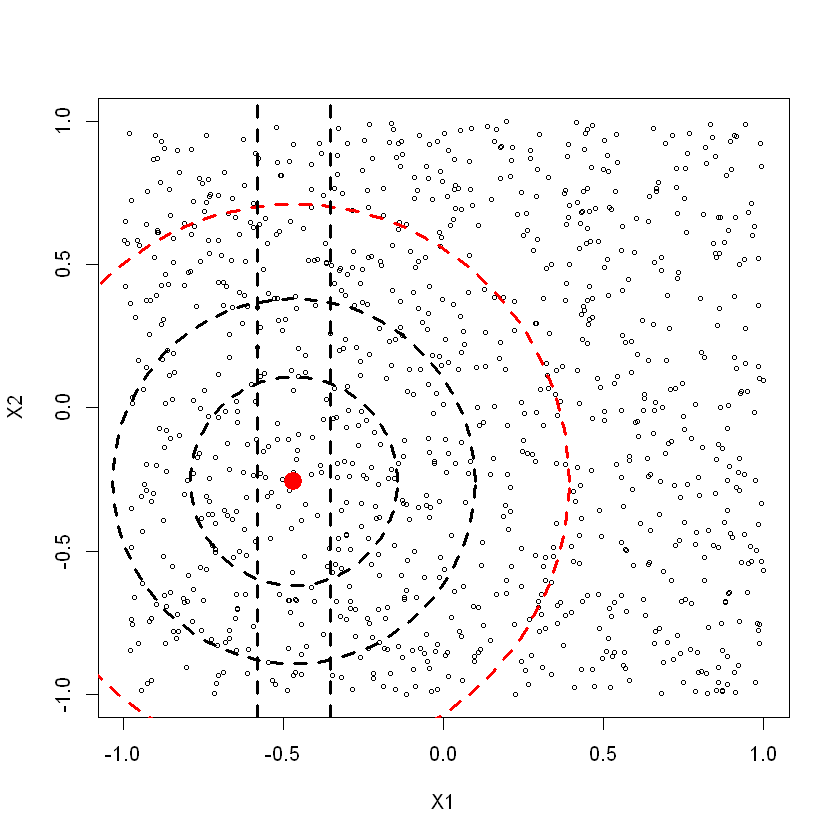

In [14]:
# Extract the data for 3D
point_4d <- p_point[1:4]
data_4d <- mat[, 1:4]

# Find the radius to get 10% of nearest data points
nearest_4d <- nearest_points(point_4d, data_4d, k)
radius_4d <- radius(point_4d, data_4d[nearest_4d, ])
print(paste0('Radius = ', radius_4d))

# Visualize in 2D
plot(data_4d, cex=0.5, xlab="X1", ylab="X2", xlim=c(-1, 1), ylim=c(-1, 1))
points(x=point_4d[1], y=point_4d[2], type="p", col="red", pch=19, cex=2)
draw.circle(x=point_4d[1], y=point_4d[2], radius=radius_4d,
            nv=100, border='red', col=NA, lwd=3, lty=2)
draw.circle(x=point_4d[1], y=point_4d[2], radius=radius_3d,
            nv=100, border='black', col=NA, lwd=3, lty=2)
draw.circle(x=point_4d[1], y=point_4d[2], radius=radius_2d,
            nv=100, border='black', col=NA, lwd=3, lty=2)
abline(v=point_4d[1]-radius_1d, col='black', lwd=3, lty=2)
abline(v=point_4d[1]+radius_1d, col='black', lwd=3, lty=2)

#### The radius to cover 10% of nearest data point in n-D

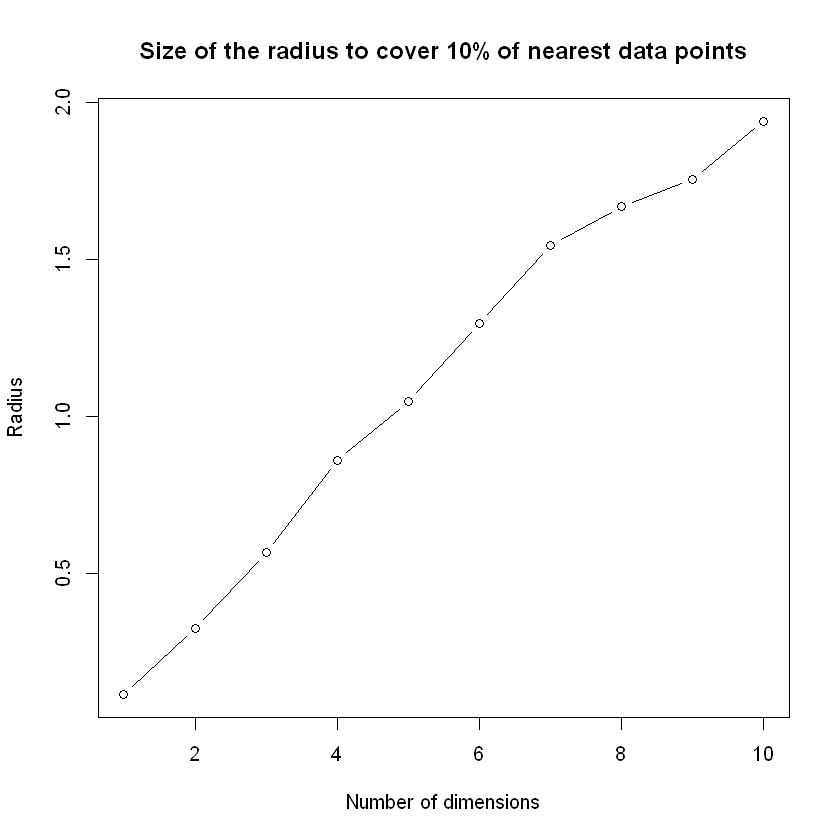

In [15]:
# Find the radius for every number of dimensions in [1, 10]
radius_list <- c()

for (n_dim in 1:10) {    
    # Extract the data for n-D
    point_nd <- p_point[1:n_dim]
    data_nd <- mat[, 1:n_dim]
    
    # Correct the matrix
    if (!is.matrix(data_nd)) data_nd <- matrix(data_nd)

    # Find the radius to get 10% of nearest data points
    nearest_nd <- nearest_points(point_nd, data_nd, k)
    radius_nd <- radius(point_nd, data_nd[nearest_nd, ])
    radius_list <- c(radius_list, radius_nd)
}

# Visualize the result
plot(radius_list, type='b',
     xlab='Number of dimensions', ylab='Radius',
     main='Size of the radius to cover 10% of nearest data points')

### 3. Simulate Bias-Variance trade-off

Source: https://daviddalpiaz.github.io/r4sl/biasvariance-tradeoff.html

#### Generate data based on f(X)

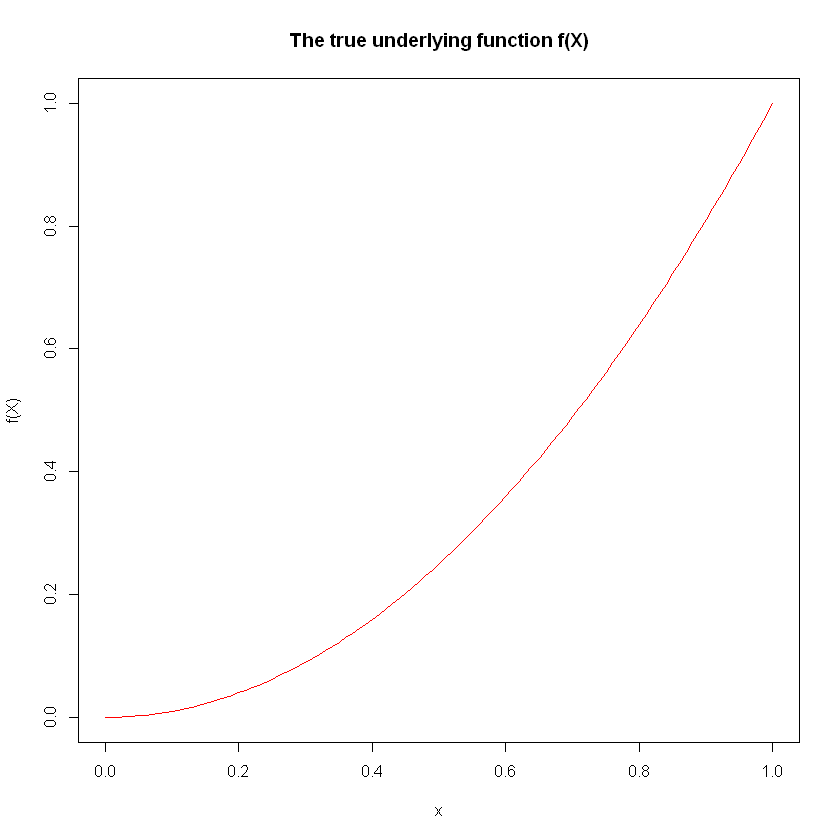

In [16]:
# The true underlying function
f <- function(x) {
  x ^ 2
}

# Plot the underlying function
# options(repr.plot.width=6, repr.plot.height=6)  # Set plot size
op <- par(cex = 0.8)  # Set font size

plot(f, type='l', col='red',
     main="The true underlying function f(X)",
     ylab="f(X)", xlab="x")

In [17]:
# Function to generate simulation data from true function f
get_sim_data <- function(f, sample_size=100) {
  x <- runif(n=sample_size, min=0, max=1)  # Generate a list of x values
  eps <- rnorm(n=sample_size, mean=0, sd=0.75)  # Generate random errors
  y <- f(x) + eps
  data.frame(x, y)
}

# Generate simulation data
set.seed(1)
n_sims <- 250  # Number of simulations
n_models <- 4  # Number of models
x <- data.frame(x=0.90)  # Fixed point at which we make predictions [test]
predictions <- matrix(0, nrow=n_sims, ncol=n_models)  # Blank matrix

#### Run the simulation

In [18]:
for (sim in 1:n_sims) {
  # Simulate new, random, training data
  sim_data <- get_sim_data(f)

  # Fit different models
  fit_0 <- lm(y ~ 1,                 data=sim_data)  # Simple linear regression
  fit_1 <- lm(y ~ poly(x, degree=1), data=sim_data)  # Polynomial regression (degree = 1)
  fit_2 <- lm(y ~ poly(x, degree=2), data=sim_data)  # Polynomial regression (degree = 2)
  fit_9 <- lm(y ~ poly(x, degree=9), data=sim_data)  # Polynomial regression (degree = 9)

  # Get predictions
  predictions[sim, 1] <- predict(fit_0, x)
  predictions[sim, 2] <- predict(fit_1, x)
  predictions[sim, 3] <- predict(fit_2, x)
  predictions[sim, 4] <- predict(fit_9, x)
}

In [19]:
# Prediction results of 4 models
head(predictions)

0.3258666,0.8026078,0.8740580,0.8400974
0.3584500,0.8086247,0.9290869,0.9553229
0.2988305,0.8882596,1.0523587,1.0652415
0.2934798,0.6446183,0.6913260,0.6451949
0.2466116,0.6604834,0.7793907,0.7260935
0.3835104,0.6651398,0.6850260,0.5974535


#### Calculate the bias, variance, mse

In [20]:
# Function to calculate mse, bias, variance
get_mse <- function(truth, estimate) {
  mean((estimate - truth) ^ 2)
}

get_bias <- function(estimate, truth) {
  mean(estimate) - truth
}

get_var <- function(estimate) {
  mean((estimate - mean(estimate)) ^ 2)
}

In [21]:
# Calculate the bias, variance, mse for simulated predictions
bias <- apply(predictions, 2, get_bias, truth=f(x=0.90))
variance <- apply(predictions, 2, get_var)
mse <- apply(predictions, 2, get_mse, truth=f(x=0.90))

# Prepare the data for plotting
bvto <- data.frame(degree=c(0, 1, 2, 9), mse=mse, bias_squared=bias^2, variance=variance)
bvto

degree,mse,bias_squared,variance
0,0.23093518,0.2249205068,0.006014669
1,0.02248629,0.0041071112,0.018379178
2,0.02417563,0.0003348458,0.023840782
9,0.06371456,0.0001312804,0.063583280


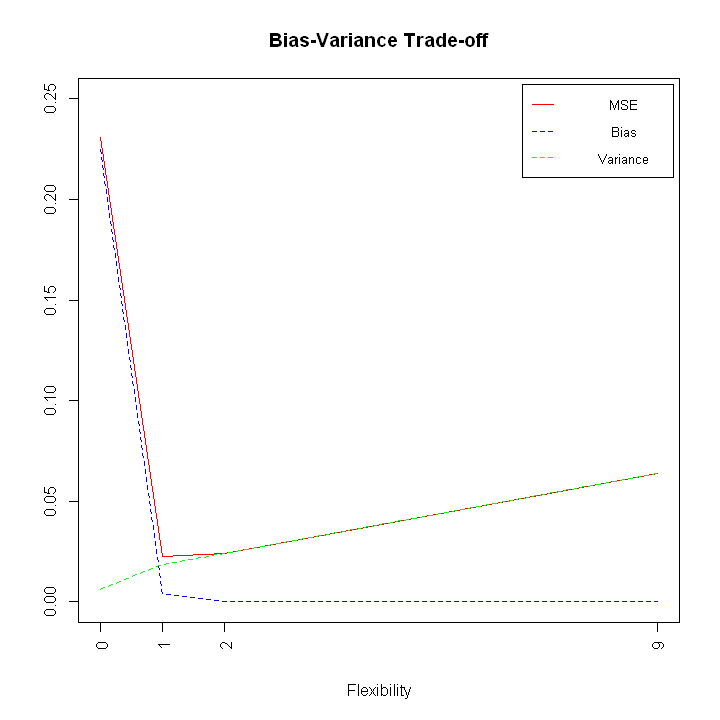

In [22]:
# Plot the Bias-Variance Trade-off
options(repr.plot.width=6, repr.plot.height=6)  # Set plot size
op <- par(cex = 0.8)  # Set font size

plot(bvto$degree, bvto$mse, type='l', col='red', ylim=c(0, 0.25),
     main="Bias-Variance Trade-off",
     ylab="", xlab="Flexibility",
     xaxt="n")  # MSE
lines(bvto$degree, bvto$bias_squared, col='blue', type="l", lty=2)  # Bias
lines(bvto$degree, bvto$variance, col='green', type="l", lty=2)  # Variance

op <- par(cex = 0.8)  # Set font size
axis(side=1, at=c(0, 1, 2, 9), las=2)  # Add x tickers
legend("topright", legend=c("MSE", "Bias", "Variance"),
       col=c("red", "blue", "green"), lty=c(1, 2, 2), cex=0.8,
       x.intersp=7, y.intersp=2, adj=0.5, inset=0.01)

### 4. Simple Linear Regression

In [23]:
# Import Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


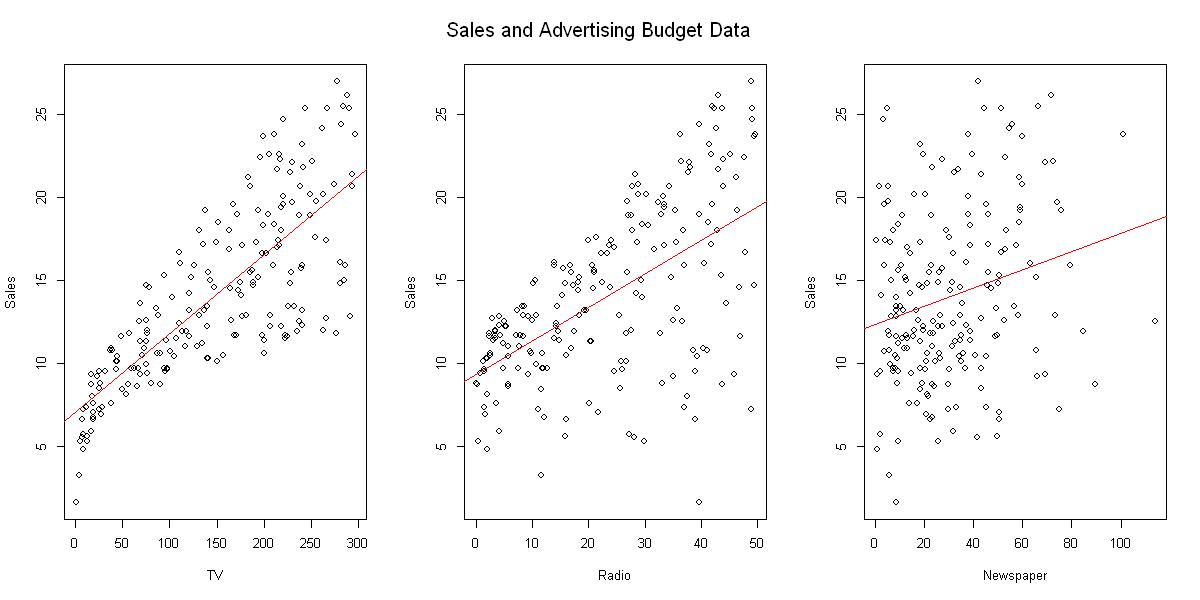

In [24]:
# Plot the data
options(repr.plot.width=10, repr.plot.height=5)  # Set plot size
par(mfrow=c(1, 3))  # Set the plot regions

plot(adv$TV, adv$sales, ylab="Sales", xlab="TV")
abline(lm(sales ~ TV, data=adv), col='red')

plot(adv$radio, adv$sales, ylab="Sales", xlab="Radio")
abline(lm(sales ~ radio, data=adv), col='red')

plot(adv$newspaper, adv$sales, ylab="Sales", xlab="Newspaper")
abline(lm(sales ~ newspaper, data=adv), col='red')

mtext("Sales and Advertising Budget Data", side=3, line=-2.5, outer=TRUE)

#### Estimation of the parameters by least squares

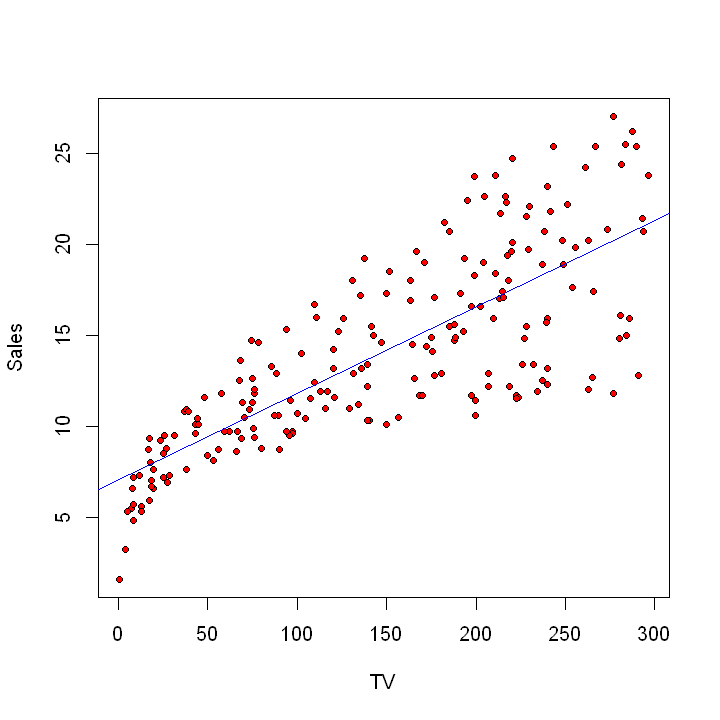

In [25]:
# Plot Sales ~ TV
options(repr.plot.width=6, repr.plot.height=6)  # Set plot size

plot(adv$TV, adv$sales, pch=21, cex=0.8, bg='red',
     xlab='TV', ylab='Sales')
abline(lm(sales ~ TV, data=adv), col='blue')

**Exercise 1:** Calculate B0, B1 for Sales ~ f(TV)

In [ ]:
avg_x <- mean (adv$TV)
avg_y <- mean (adv$Sales)

B1 <- sum ((adv$TV)- avg_x)*(adv$Sales)- avg_y)*(adv$TV- avg_x)^2))
B0 <- 

**Exercise 2:** Calculate B0, B1 for Sales ~ f(Radio)

In [ ]:
md <- lm (sales ~ TV, data=adv)
summary (md)

**Exercise 3:** Calculate the 95% confidence interval of B0, B1 for model Sales ~ f(TV)?

**Exercise 4:** Calculate the t-statistic and p-value for predictors radio and newspaper.

Calculate t-statistic for Sales ~ f(Radio)

Calculate t-statistic for Sales ~ f(Newspaper)

**Exercise 5:** Calculate the RSE and R-squared for predictors radio and newspaper.

Calculate the RSE and R-squared for Sales ~ f(Radio)

Calculate the RSE and R-squared for Sales ~ f(Newspaper)

### 5. Multiple Linear Regression

In [26]:
# Import Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)
str(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


**Exercise 6:** Use the matrix formula to estimate the parameters of multilinear regression model.

In [32]:
x <- as.matrix (cbind (1, adv$TV, adv$radio))
y <- as.matrix (adv$sales)

In [34]:
beta_hat <- solve (t(x)%*% x) %*% t(x) %*% y
beta_hat

2.92109991
0.04575482
0.18799423


In [28]:
md <- lm (sales ~., data=adv)
summary (md)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:20: unexpected symbol
1: md <- lm (sales ~. data
                       ^


## Lab: 

1. Construct your own Multiple Linear Regression model on Credit data.

2. Linear Regression with Interactions term on Advertising data.

3. Polynomial regression on Auto data.

**1. Construct your own Multiple Linear Regression model on Credit data: Predict customer balance**

In [3]:
# Import data
credit <- read.csv('./data/Credit.csv', row.names=1)
head(credit)


Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
104.593,7075,514,4,71,11,Male,No,No,Asian,580
148.924,9504,681,3,36,11,Female,No,No,Asian,964
55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


Using the matrix formula to manually estimate the multiple linear regression model with 3 predictors Age, Rating, Limit.

In [4]:
# Construct matrix X, y
X <- as.matrix(cbind(1, creditAge$Rating, credit$Rating, credit$Limit))
y <- as.matrix(credit$Balance)

ERROR: Error in cbind(1, creditAge, credit$Rating, credit$Limit): object 'creditAge' not found


In [5]:
# Estimate the coefficient matrix
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

ERROR: Error in t(X): object 'X' not found


In [8]:
# Compare with function of R
md_full <- lm(Balance ~ Income + Cards + Age + Rating + Limit, data=credit)
summary(md_full)


Call:
lm(formula = Balance ~ Income + Cards + Age + Rating + Limit, 
    data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-231.37 -113.46  -39.55   41.66  544.35 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -449.36101   40.57409 -11.075   <2e-16 ***
Income        -7.56211    0.38214 -19.789   <2e-16 ***
Cards         11.55272    7.06285   1.636   0.1027    
Age           -0.88832    0.47781  -1.859   0.0638 .  
Rating         2.02240    0.79208   2.553   0.0110 *  
Limit          0.12855    0.05289   2.430   0.0155 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 161.6 on 394 degrees of freedom
Multiple R-squared:  0.8781,	Adjusted R-squared:  0.8765 
F-statistic: 567.4 on 5 and 394 DF,  p-value: < 2.2e-16


In [49]:
colnames (credit)

[1] "Income"    "Limit"     "Rating"    "Cards"     "Age"       "Education"
 [7] "Gender"    "Student"   "Married"   "Ethnicity" "Balance"

In [53]:
md <- lm (Balance ~Income + Cards + Limit + Student + Age, data=credit)
summary (md)


Call:
lm(formula = Balance ~ Income + Cards + Limit + Student + Age, 
    data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-187.05  -79.57  -12.59   56.06  322.56 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.673e+02  2.199e+01 -21.250  < 2e-16 ***
Income      -7.760e+00  2.341e-01 -33.149  < 2e-16 ***
Cards        2.355e+01  3.628e+00   6.492 2.55e-10 ***
Limit        2.661e-01  3.535e-03  75.296  < 2e-16 ***
StudentYes   4.284e+02  1.655e+01  25.886  < 2e-16 ***
Age         -6.220e-01  2.933e-01  -2.120   0.0346 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 99.12 on 394 degrees of freedom
Multiple R-squared:  0.9541,	Adjusted R-squared:  0.9535 
F-statistic:  1638 on 5 and 394 DF,  p-value: < 2.2e-16


**2. Linear Regression with Interactions term on Advertising data: Predict sales**

In [9]:
# Read Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


In [10]:
# Show the linear regression model with all variables
md <- lm(sales ~ ., data=adv)
summary(md)


Call:
lm(formula = sales ~ ., data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [11]:
# Add interaction term: radio x TV
md_int <- lm(sales ~ TV + radio + radio * TV, data=adv)
summary(md_int)


Call:
lm(formula = sales ~ TV + radio + radio * TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV:radio    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16


**3. Polynomial regression on Auto data: Predict miles per gallon of the car (mpg)**

In [16]:
# Import data
auto <- fread('./data/Auto.csv')
auto$horsepower <- as.numeric(auto$horsepower)  # Correct data format
head(auto)
str(auto)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


Classes 'data.table' and 'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...
 - attr(*, ".internal.selfref")=<externalptr> 



Call:
lm(formula = mpg ~ horsepower, data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


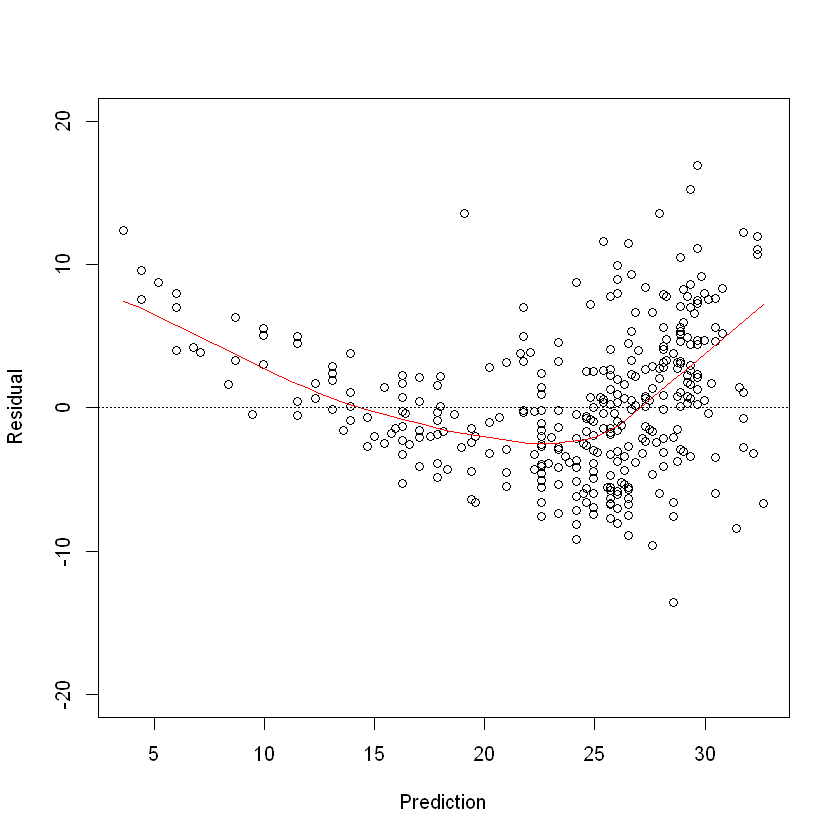

In [17]:
# Fit a simple linear regression model
md <- lm(mpg ~ horsepower, data=auto)
summary(md)

# Make prediction
y_pred <- predict(md, newdata=auto)  # Prediction
y_res <- auto$mpg - y_pred  # Model residual

# Visualize the residual of the prediction
plot(x=y_pred, y=y_res, ylim=c(-20, 20),
     xlab="Prediction", ylab="Residual")
lines(loess.smooth(x=y_pred, y=y_res), col='red')
abline(h=0, col='black', lty=3)


Call:
lm(formula = mpg ~ horsepower + I(horsepower^2), data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     56.9000997  1.8004268   31.60   <2e-16 ***
horsepower      -0.4661896  0.0311246  -14.98   <2e-16 ***
I(horsepower^2)  0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.374 on 389 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


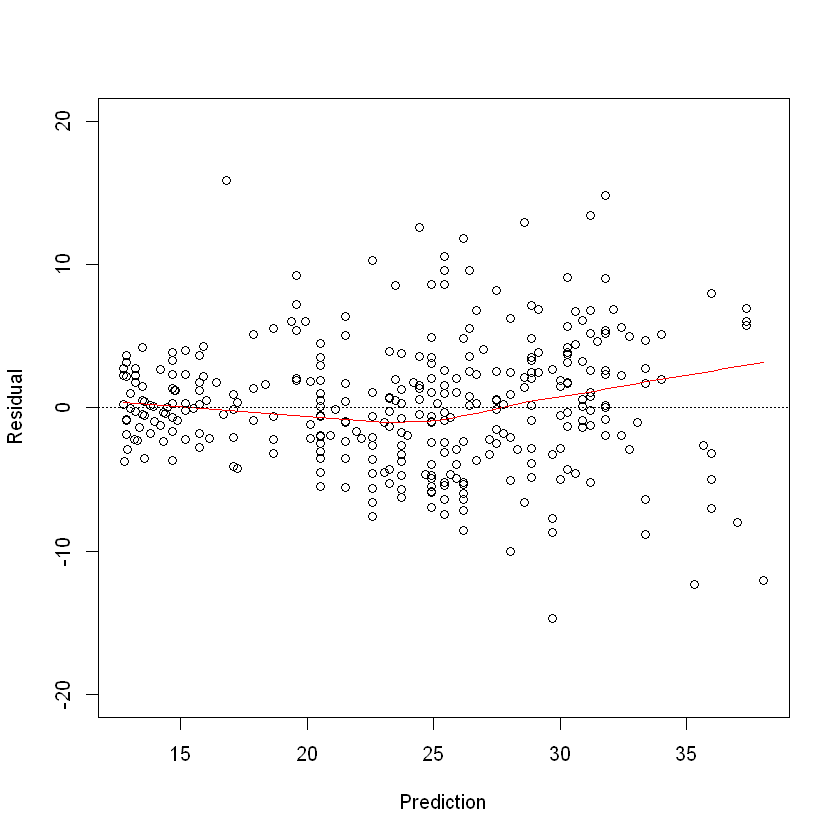

In [18]:
# Fit a polynomial regression model
md <- lm(mpg ~ horsepower + I(horsepower^2), data=auto)
summary(md)

# Make prediction
y_pred <- predict(md, newdata=auto)
y_res <- auto$mpg - y_pred

# Visualize the residual of the prediction
plot(x=y_pred, y=y_res, ylim=c(-20, 20),
     xlab="Prediction", ylab="Residual")
lines(loess.smooth(x=y_pred, y=y_res), col='red')
abline(h=0, col='black', lty=3)

## Homework
- Exercise 2 (p.52, Chap.2), 10 (p.56, Chap.2), 3 (p.120, Chap.3), 10 (p.123, Chap.3) and 15 (p.126, Chap.3).